In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

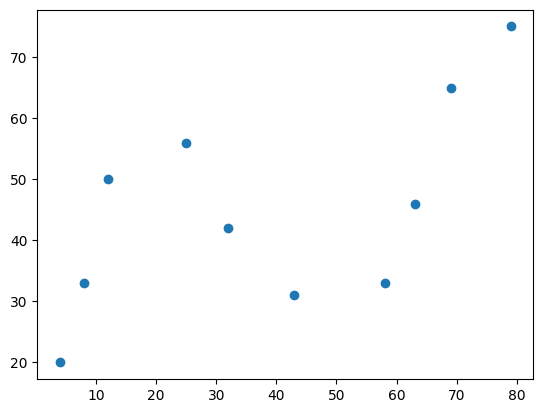

In [3]:
plt.scatter(x, y)

In [4]:
def func(p, x):
    # 根据公式，定义 2 次多项式函数
    w0, w1, w2 = p
    f = w0 + w1 * x + w2 * x * x
    return f


def err_func(p, x, y):
    # 残差函数（观测值与拟合值之间的差距）
    ret = func(p, x) - y
    return ret

In [6]:

import numpy as np
from scipy.optimize import leastsq

scipy.optimize.leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0, ftol=1.49012e-8, xtol=1.49012e-8, gtol=0.0, maxfev=0, epsfcn=None, factor=100, diag=None)

参数
func: 计算残差的函数，形如 func(x, *args)，其中 x 是拟合参数数组，args 是额外的参数。
x0: 初始拟合参数的估计值数组。
args: 传递给 func 的额外参数元组。
Dfun: （可选）用户提供的雅可比矩阵的函数，形如 Dfun(x, *args)。
full_output: （可选）如果为 True，函数将返回额外的输出信息。
col_deriv: （可选）如果为 True，雅可比矩阵按列排列。
ftol: （可选）目标函数值收敛的相对误差。
xtol: （可选）解的相对误差。
gtol: （可选）梯度的正则化参数。
maxfev: （可选）允许的最大函数调用次数。
epsfcn: （可选）用于数值差分计算雅可比矩阵的步长。
factor: （可选）用于确定步长的参数。
diag: （可选）对角缩放因子数组。
返回值
返回一个包含以下内容的元组：

x: 拟合参数的最佳估计值。
cov_x: （如果 full_output 为 True）参数的协方差矩阵。
infodict: （如果 full_output 为 True）包含解的信息的字典。
mesg: （如果 full_output 为 True）描述收敛情况的消息。
ier: 收敛标志，0 表示未收敛，1 表示收敛。
示例

In [7]:
p_init = np.random.randn(3)  # 生成 3 个随机数
# 使用 Scipy 提供的最小二乘法函数得到最佳拟合参数
parameters = leastsq(err_func,p_init,args=(np.array(x), np.array(y)))

print("Fitting Parameters: ", parameters[0])

Fitting Parameters:  [ 3.76893111e+01 -2.60474096e-01  8.00078020e-03]


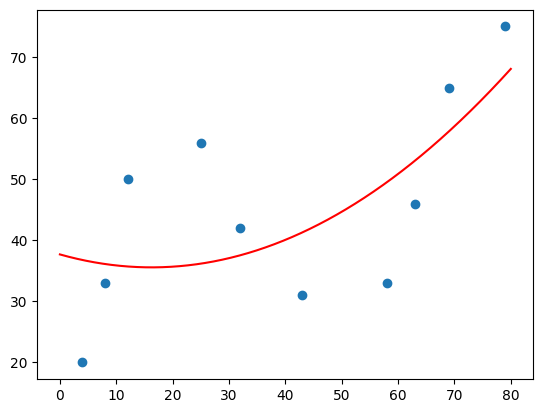

In [8]:
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制拟合函数曲线
plt.plot(x_temp, func(parameters[0], x_temp), "r")

# 绘制原数据点
plt.scatter(x, y)




 ## 使用 np.poly1d()

In [9]:
def fit_func(p, x):
    """根据公式，定义 n 次多项式函数"""
    f = np.poly1d(p)
    return f(x)


def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）"""
    ret = fit_func(p, x) - y
    return ret


def n_poly(n):
    """n 次多项式拟合"""
    p_init = np.random.randn(n)  # 生成 n 个随机数
    parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
    return parameters[0]


In [10]:
n_poly(3)

array([ 8.00078124e-03, -2.60474186e-01,  3.76893123e+01])

Text(0.5, 1.0, 'm = 8')

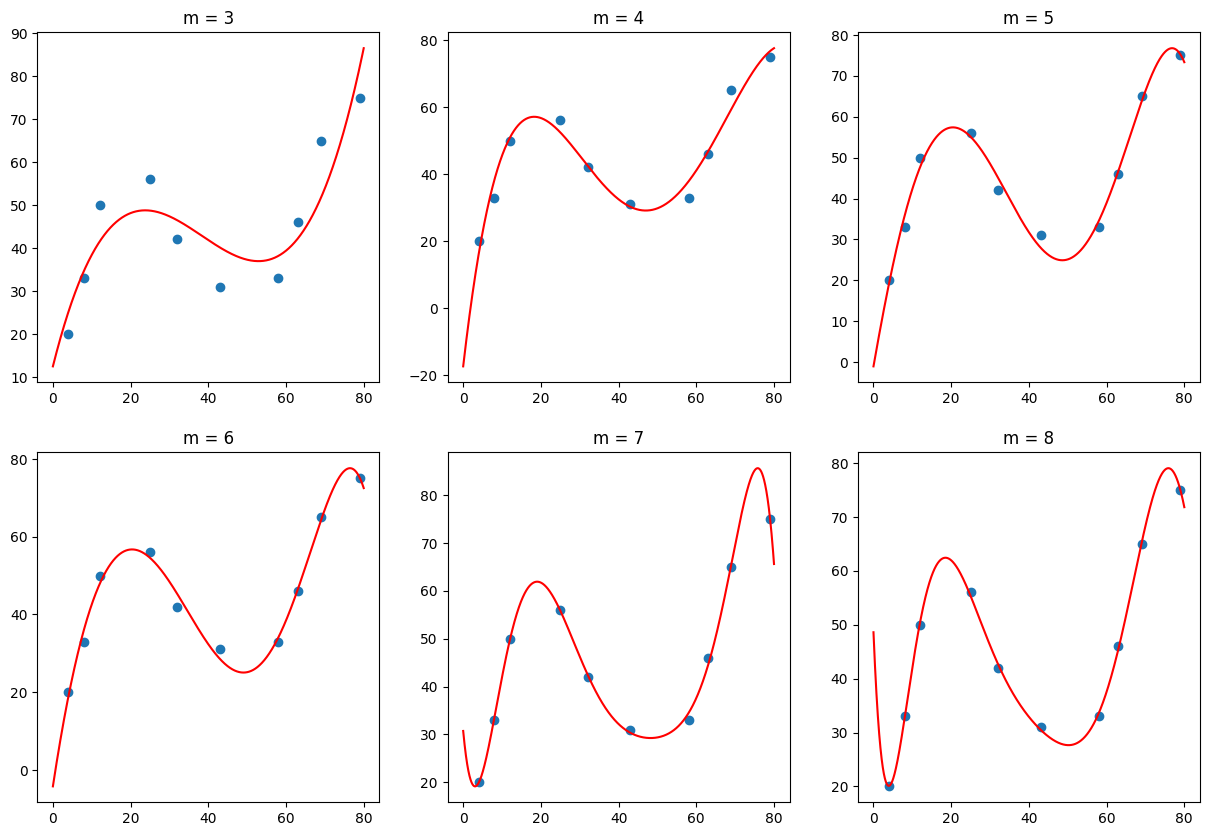

In [11]:
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(x_temp, fit_func(n_poly(4), x_temp), "r")
axes[0, 0].scatter(x, y)
axes[0, 0].set_title("m = 3")

axes[0, 1].plot(x_temp, fit_func(n_poly(5), x_temp), "r")
axes[0, 1].scatter(x, y)
axes[0, 1].set_title("m = 4")

axes[0, 2].plot(x_temp, fit_func(n_poly(6), x_temp), "r")
axes[0, 2].scatter(x, y)
axes[0, 2].set_title("m = 5")

axes[1, 0].plot(x_temp, fit_func(n_poly(7), x_temp), "r")
axes[1, 0].scatter(x, y)
axes[1, 0].set_title("m = 6")

axes[1, 1].plot(x_temp, fit_func(n_poly(8), x_temp), "r")
axes[1, 1].scatter(x, y)
axes[1, 1].set_title("m = 7")

axes[1, 2].plot(x_temp, fit_func(n_poly(9), x_temp), "r")
axes[1, 2].scatter(x, y)
axes[1, 2].set_title("m = 8")

通过 PolynomialFeatures() 类自动产生多项式特征矩阵

In [12]:
# sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
# - degree: 多项式次数，默认为 2 次多项式
# - interaction_only: 默认为 False，如果为 True 则产生相互影响的特征集。
# - include_bias: 默认为 True，包含多项式中的截距项。   多了第 0 列 全为1

In [20]:
from sklearn.preprocessing import PolynomialFeatures
X = [2, -1, 3]
X_reshape  = np.array(X).reshape(-1,1)
PolynomialFeatures(degree=2, interaction_only=False, include_bias=False).fit_transform(X_reshape)

array([[ 2.,  4.],
       [-1.,  1.],
       [ 3.,  9.]])

In [23]:
x = np.array(x).reshape(-1, 1)  
y = np.array(y).reshape(-1,1)
x,

(array([[ 4],
        [ 8],
        [12],
        [25],
        [32],
        [43],
        [58],
        [63],
        [69],
        [79]]),)

In [26]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
poly_x = poly_features.fit_transform(x)
poly_x

array([[4.0000000e+00, 1.6000000e+01, 6.4000000e+01, 2.5600000e+02],
       [8.0000000e+00, 6.4000000e+01, 5.1200000e+02, 4.0960000e+03],
       [1.2000000e+01, 1.4400000e+02, 1.7280000e+03, 2.0736000e+04],
       [2.5000000e+01, 6.2500000e+02, 1.5625000e+04, 3.9062500e+05],
       [3.2000000e+01, 1.0240000e+03, 3.2768000e+04, 1.0485760e+06],
       [4.3000000e+01, 1.8490000e+03, 7.9507000e+04, 3.4188010e+06],
       [5.8000000e+01, 3.3640000e+03, 1.9511200e+05, 1.1316496e+07],
       [6.3000000e+01, 3.9690000e+03, 2.5004700e+05, 1.5752961e+07],
       [6.9000000e+01, 4.7610000e+03, 3.2850900e+05, 2.2667121e+07],
       [7.9000000e+01, 6.2410000e+03, 4.9303900e+05, 3.8950081e+07]])

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_x, y)  # 训练
# 得到模型拟合参数
model.intercept_, model.coef_

(array([-17.31181867]),
 array([[ 1.00457408e+01, -4.42723418e-01,  6.98559436e-03,
         -3.54490759e-05]]))

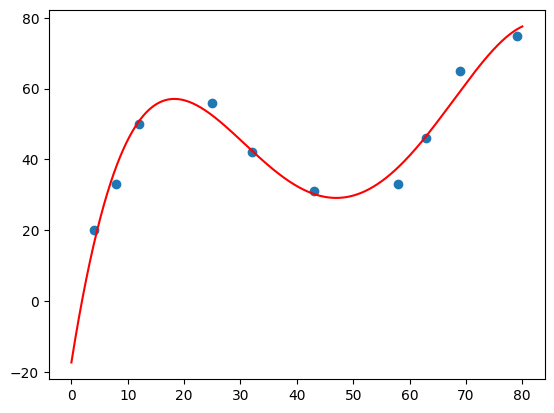

In [28]:
x_temp = np.array(x_temp).reshape(-1, 1)

plt.plot(x_temp, model.predict(poly_features.fit_transform(x_temp)), "r")
plt.scatter(x, y)

多项式回归预测相应年份的麻疹疫苗接种率

In [29]:
import pandas as pd
df = pd.read_csv('./data/course-6-vaccine.csv')
df.head()

,Year,Values
0,1983,48.676809
1,1984,50.653151
2,1985,45.603729
3,1986,45.511160
4,1987,52.882892


In [30]:
df.size

68

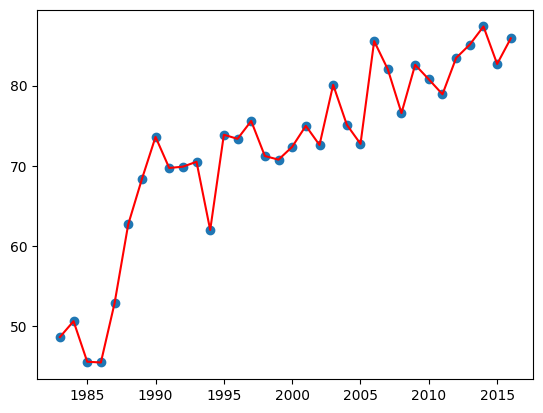

In [31]:
# 定义 x, y 的取值
x = df["Year"]
y = df["Values"]
# 绘图
plt.plot(x, y, "r")
plt.scatter(x, y)

In [32]:
# 首先划分 dateframe 为训练集和测试集
train_df = df[: int(len(df) * 0.7)]
test_df = df[int(len(df) * 0.7) :]

# 定义训练和测试使用的自变量和因变量
# rain_df["Year"] 是 pandas 的数据结构 pd.Series    
# X_train 是 numpy 的数据结构 np.ndarray     
X_train = train_df["Year"].values  
y_train = train_df["Values"].values

X_test = test_df["Year"].values
y_test = test_df["Values"].values

0     1983
1     1984
2     1985
3     1986
4     1987
5     1988
6     1989
7     1990
8     1991
9     1992
10    1993
11    1994
12    1995
13    1996
14    1997
15    1998
16    1999
17    2000
18    2001
19    2002
20    2003
21    2004
22    2005
Name: Year, dtype: int64

线性回归

In [37]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
results = model.predict(X_test.reshape(-1, 1))
results  # 线性回归模型在测试集上的预测结果

array([[81.83437635],
       [83.09935437],
       [84.36433239],
       [85.62931041],
       [86.89428843],
       [88.15926645],
       [89.42424447],
       [90.68922249],
       [91.95420051],
       [93.21917853],
       [94.48415655]])

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("线性回归平均绝对误差: ", mean_absolute_error(y_test, results.flatten())) # flatten 多维数组展平为一维数组
print("线性回归均方误差: ", mean_squared_error(y_test, results.flatten()))

线性回归平均绝对误差:  6.011979515629853
线性回归均方误差:  43.53185829515393


多项式回归

In [39]:
# 2 次多项式回归特征矩阵
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_X_train_2 = poly_features_2.fit_transform(X_train.reshape(len(X_train), 1))
poly_X_test_2 = poly_features_2.fit_transform(X_test.reshape(len(X_test), 1))

# 2 次多项式回归模型训练与预测
model = LinearRegression()
model.fit(poly_X_train_2, y_train.reshape(len(X_train), 1))  # 训练模型

results_2 = model.predict(poly_X_test_2)  # 预测结果

print("2 次多项式回归平均绝对误差: ", mean_absolute_error(y_test, results_2.flatten()))
print("2 次多项式均方误差: ", mean_squared_error(y_test, results_2.flatten()))

2 次多项式回归平均绝对误差:  19.79207082954649
2 次多项式均方误差:  464.3290384745864


线性回归模型的预测结果要优于 2 次多项式回归模型的预测结果

这里将通过实例化 make_pipeline 管道类，实现调用一次 fit 和 predict 方法即可应用于所有预测器。
make_pipeline 是使用  sklearn 过程中的技巧创新，其可以将一个处理流程封装起来使用。

具体来讲，例如上面的多项式回归中，我们需要先使用 PolynomialFeatures 完成特征矩阵转换，再放入 LinearRegression 中。
那么，PolynomialFeatures + LinearRegression 这一个处理流程，就可以通过 make_pipeline 封装起来使用

In [41]:
from sklearn.pipeline import make_pipeline


In [42]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [43]:
for m in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    pre_y = model.predict(X_test)
    print("{} 次多项式回归平均绝对误差: ".format(m), mean_absolute_error(y_test, pre_y.flatten()))
    print("{} 次多项式均方误差: ".format(m), mean_squared_error(y_test, pre_y.flatten()))
    print("---")

3 次多项式回归平均绝对误差:  4.547691414650137
3 次多项式均方误差:  29.93305220364425
---
4 次多项式回归平均绝对误差:  4.426426085366537
4 次多项式均方误差:  29.050774513159652
---
5 次多项式回归平均绝对误差:  4.34161548610515
5 次多项式均方误差:  28.22191872438411
---


In [44]:
# 计算 m 次多项式回归预测结果的 MSE 评价指标并绘图
mse = []  # 用于存储各最高次多项式 MSE 值
m = 1  # 初始 m 值
m_max = 10  # 设定最高次数
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)  # 训练模型
    pre_y = model.predict(X_test)  # 测试模型
    mse.append(mean_squared_error(y_test, pre_y.flatten()))  # 计算 MSE
    m = m + 1

MSE 计算结果:  [43.53185829515393, 464.3290384745864, 29.93305220364425, 29.050774513159652, 28.22191872438411, 27.44082166717476, 26.71232004773834, 26.038729581722613, 25.422418032301838, 24.865818415954422]


Text(0, 0.5, 'MSE')

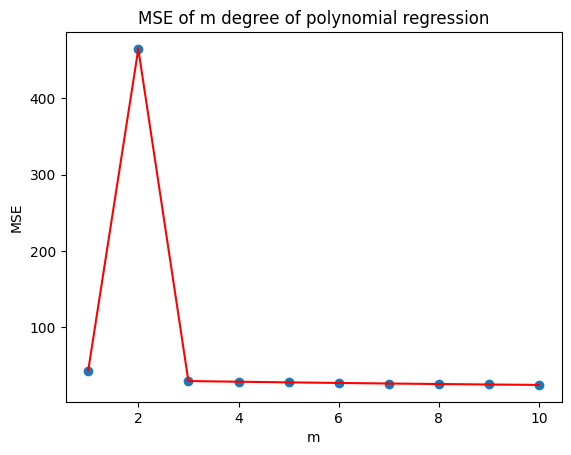

In [49]:

print("MSE 计算结果: ", mse)
# 绘图
plt.plot([i for i in range(1, m_max + 1)], mse, "r")
plt.scatter([i for i in range(1, m_max + 1)], mse)

# 绘制图名称等
plt.title("MSE of m degree of polynomial regression")
plt.xlabel("m")
plt.ylabel("MSE")

In [45]:
[i for i in range(1, m_max + 1)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [48]:
np.arange(10).tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]